# San Francisco Airport Statistics for Data Visualization

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#import skfuzzy as fuzz  no component is available
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.model_selection import validation_curve, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
#import torch
import tensorflow as tf

If you're using Jupyter Notebook, run this inside a notebook cell:

!pip install torch torchvision torchaudio

In [2]:
# !pip install torch torchvision torchaudio

In [3]:
Aircraft_Statistics = pd.read_csv("Air_Traffic_Passenger_Statistics.csv")
Aircraft_Statistics

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,data_as_of,data_loaded_at
0,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,31432,2025/04/20 01:01:07 PM,2025/04/22 03:02:20 PM
1,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,31353,2025/04/20 01:01:08 PM,2025/04/22 03:02:20 PM
2,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,2518,2025/04/20 01:01:08 PM,2025/04/22 03:02:20 PM
3,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Deplaned,Other,Terminal 2,D,1324,2025/04/20 01:01:08 PM,2025/04/22 03:02:20 PM
4,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Enplaned,Other,Terminal 2,D,1198,2025/04/20 01:01:08 PM,2025/04/22 03:02:20 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37677,202502,2025/02/01,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Enplaned,Other,International,A,5061,2025/04/20 01:01:09 PM,2025/04/22 03:02:20 PM
37678,202502,2025/02/01,WestJet,WS,WestJet,WS,International,Canada,Deplaned,Other,International,A,2092,2025/04/20 01:01:09 PM,2025/04/22 03:02:20 PM
37679,202502,2025/02/01,WestJet,WS,WestJet,WS,International,Canada,Enplaned,Other,International,A,2154,2025/04/20 01:01:09 PM,2025/04/22 03:02:20 PM
37680,202502,2025/02/01,ZIPAIR Tokyo Inc,ZG,ZIPAIR Tokyo Inc,ZG,International,Asia,Deplaned,Other,International,A,6162,2025/04/20 01:01:09 PM,2025/04/22 03:02:20 PM


In [4]:
# Display unique counts for categorical columns
print("Unique values count:")
print(f"Operating Airline: {Aircraft_Statistics['Operating Airline'].nunique()}")
print(f"GEO Summary: {Aircraft_Statistics['GEO Summary'].nunique()}")
print(f"GEO Region: {Aircraft_Statistics['GEO Region'].nunique()}")
print(f"Boarding Area: {Aircraft_Statistics['Boarding Area'].nunique()}")


Unique values count:
Operating Airline: 138
GEO Summary: 2
GEO Region: 9
Boarding Area: 8


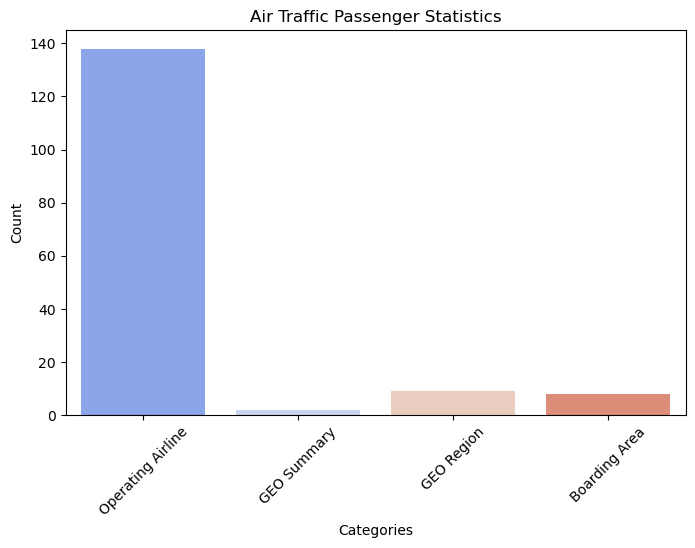

In [5]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Define the data
categories = ["Operating Airline", "GEO Summary", "GEO Region", "Boarding Area"]
values = [138, 2, 9, 8]

# Create a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=categories, y=values, palette="coolwarm")

# Add labels and title
plt.xlabel("Categories")
plt.ylabel("Count")
plt.title("Air Traffic Passenger Statistics")
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [6]:
# import pandas as pd

# # Load CSV file
# df = pd.read_csv("Air_Traffic_Passenger_Statistics.csv")

# Extract unique Operating Airlines
operating_airlines = Aircraft_Statistics["Operating Airline"].dropna().unique()

# Display the list of Operating Airlines
print("List of Operating Airlines:")
for airline in operating_airlines:
    print(airline)

List of Operating Airlines:
ATA Airlines
Aeroflot Russian International Airlines
Air Canada
Air China
Air Europe
Air France
Alaska Airlines
Alitalia Airlines
All Nippon Company Airways, Ltd.
American Airlines
Asiana Airlines
British Airways
Canadian Airlines
Cathay Pacific
Champion Air
China Airlines
China Eastern Airlines, Inc
Delta Air Lines
EVA Airways
Finnair
Frontier Airlines
Hawaiian Airlines
Japan Airlines
KLM Royal Dutch Airlines
Korean Air Lines
Lufthansa German Airlines
Mexicana Airlines
Miami Air International
Midwest Airlines
National Airlines
Northwest Airlines (became Delta)
Philippine Airlines
Reno Air
Ryan International Airlines
Singapore Airlines
SkyWest Airlines
Sobelair Airlines
Southwest Airlines
Sports Jet
Star Air
Sun Country Airlines
Swissair
TACA International Airlines, S.A.
TWA
Tower Air
Trans States Airlines
US Airways
United Airlines
United Airlines - Pre 07/01/2013
Virgin Atlantic
North American Airlines
Allegiant Air
Sports Hawk
Allegro Airlines
Tradewinds 

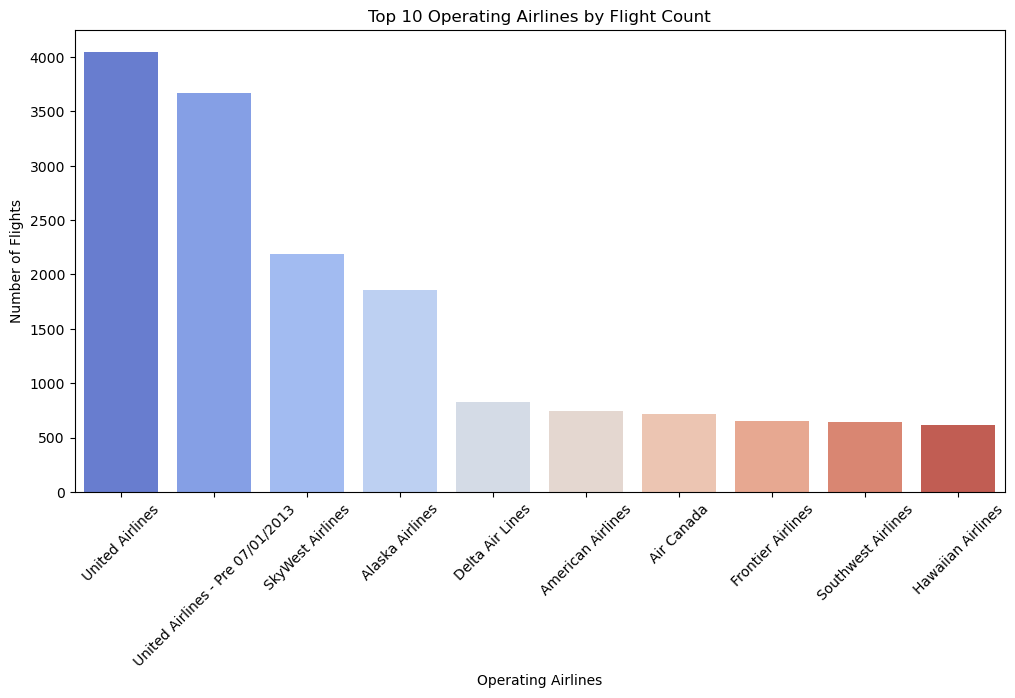

In [7]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Load CSV file
# df = pd.read_csv("Air_Traffic_Passenger_Statistics.csv")

# Count occurrences of each Operating Airline
airline_counts = Aircraft_Statistics["Operating Airline"].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=airline_counts.index[:10], y=airline_counts.values[:10], palette="coolwarm")

# Add labels and title
plt.xlabel("Operating Airlines")
plt.ylabel("Number of Flights")
plt.title("Top 10 Operating Airlines by Flight Count")
plt.xticks(rotation=45)

# Display the plot
plt.show()

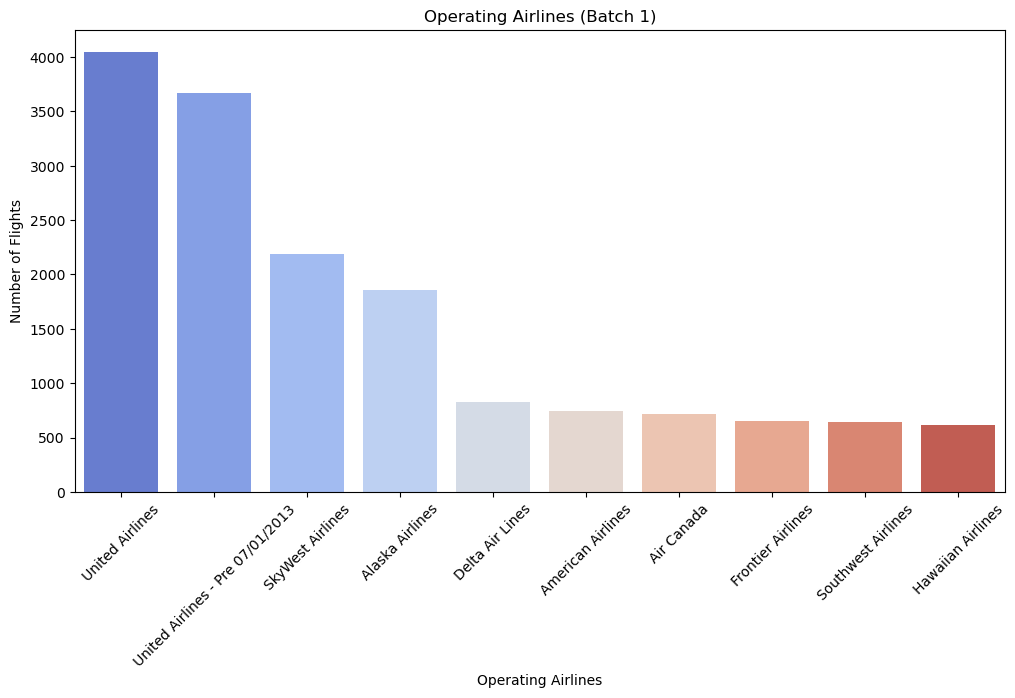

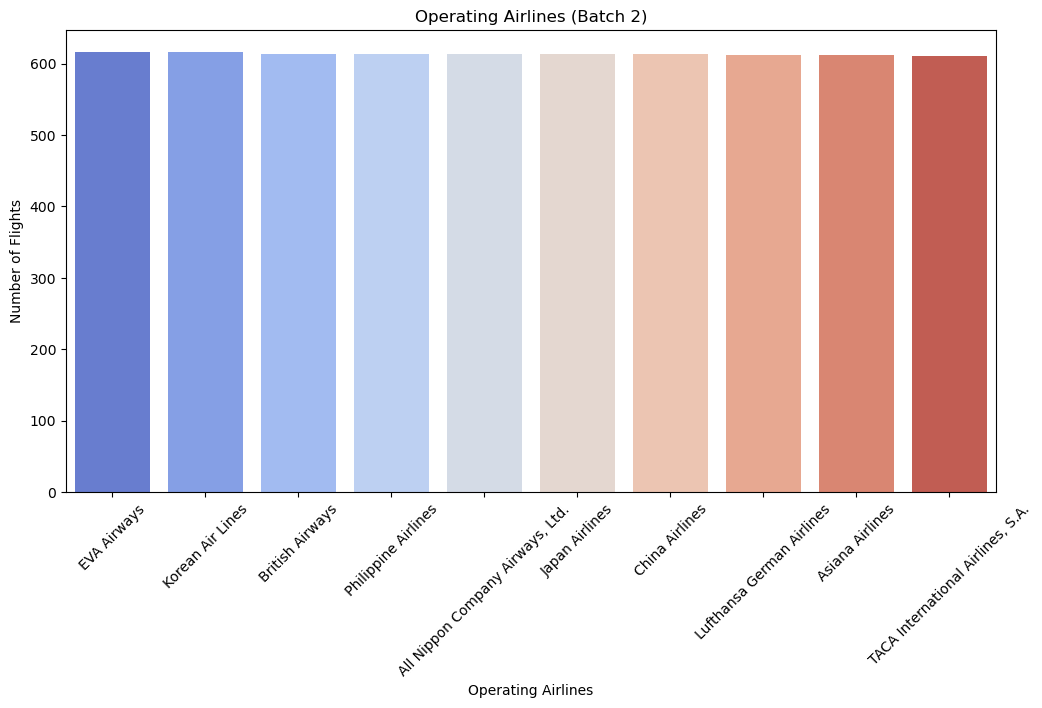

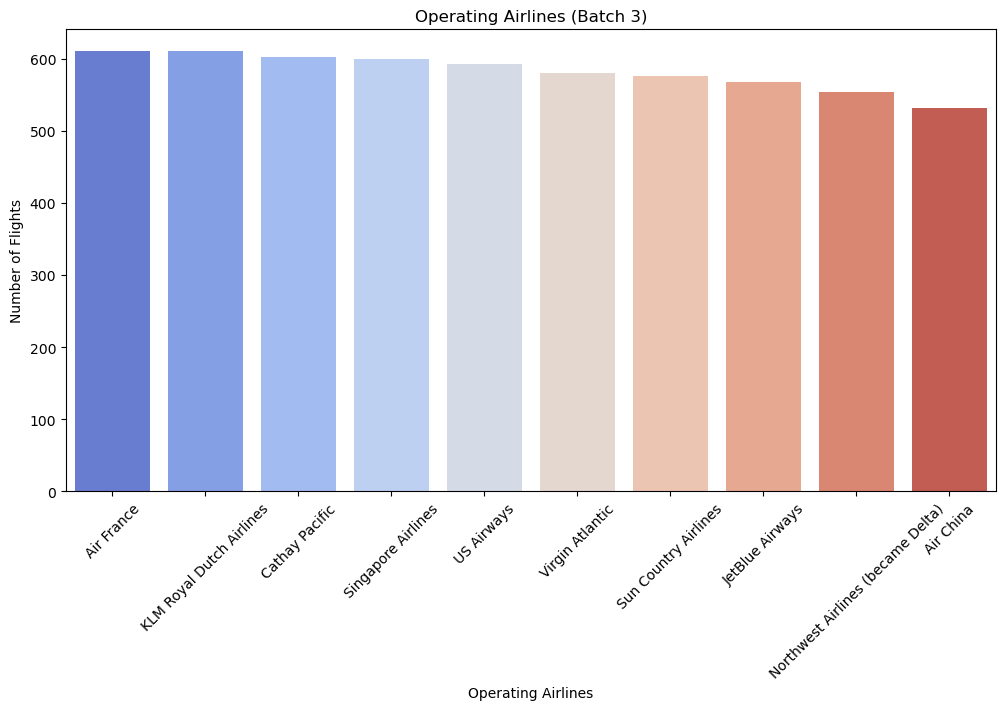

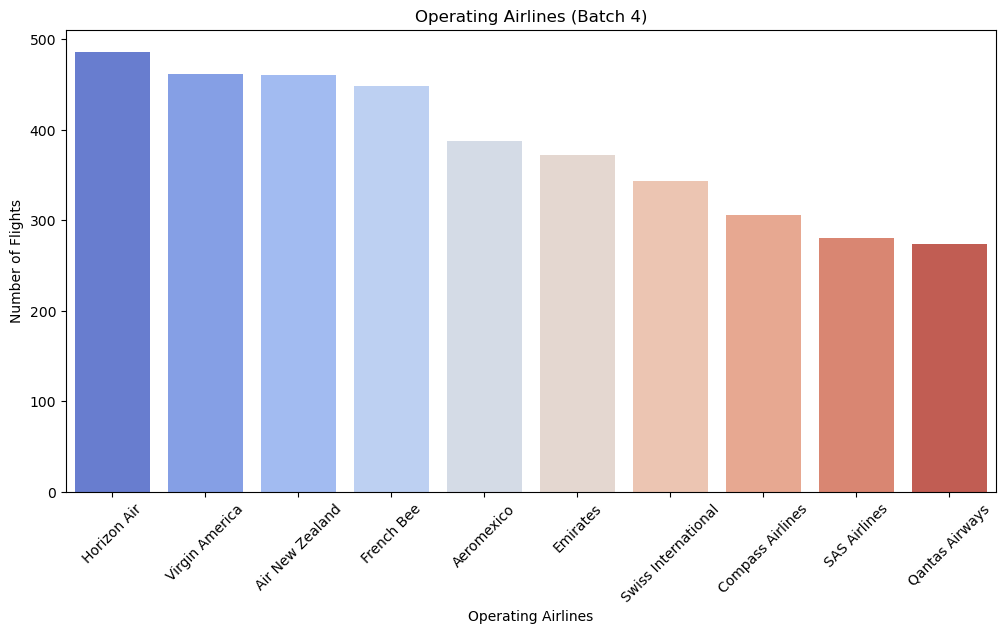

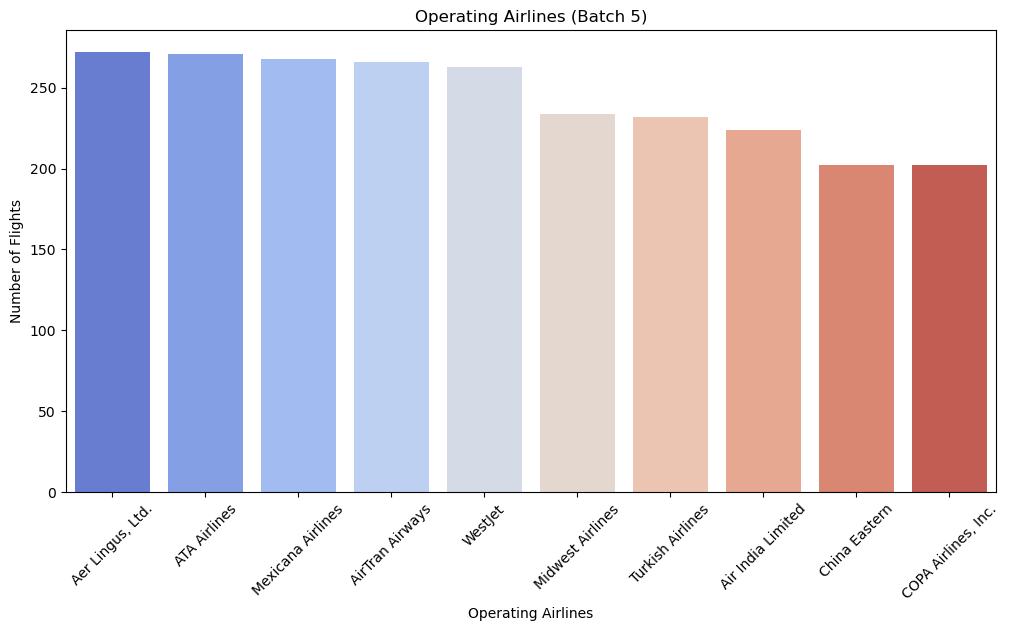

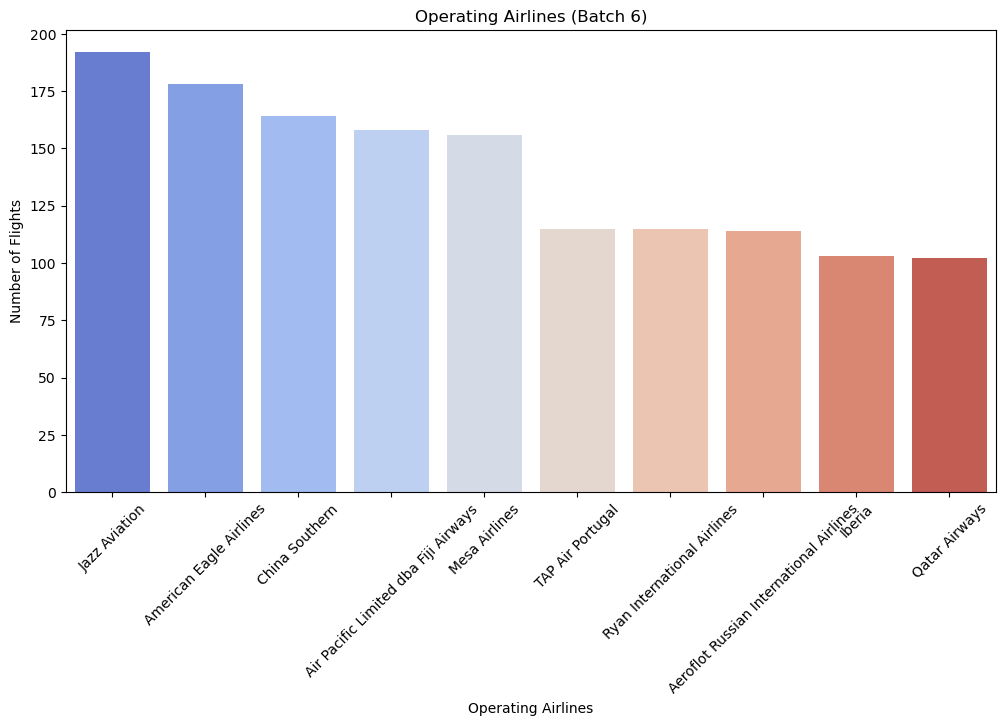

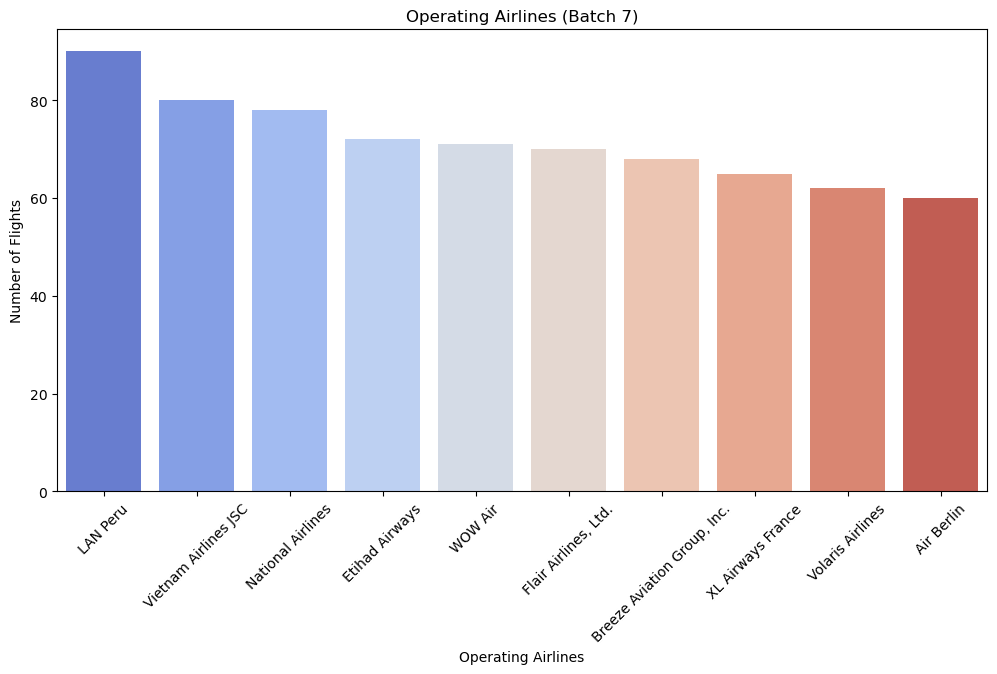

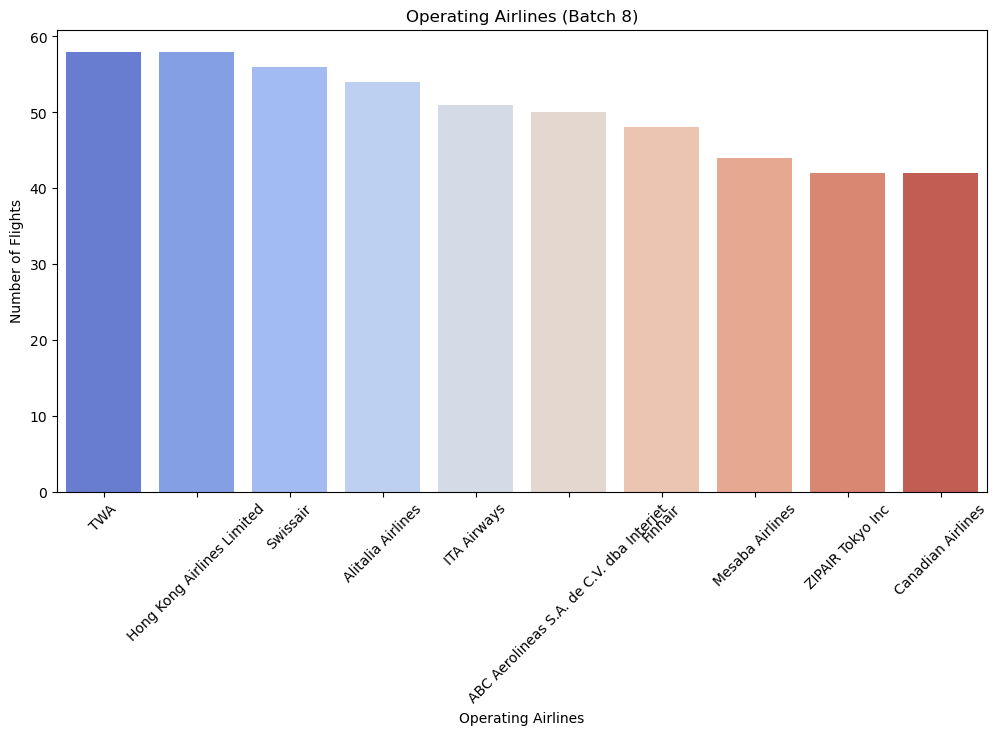

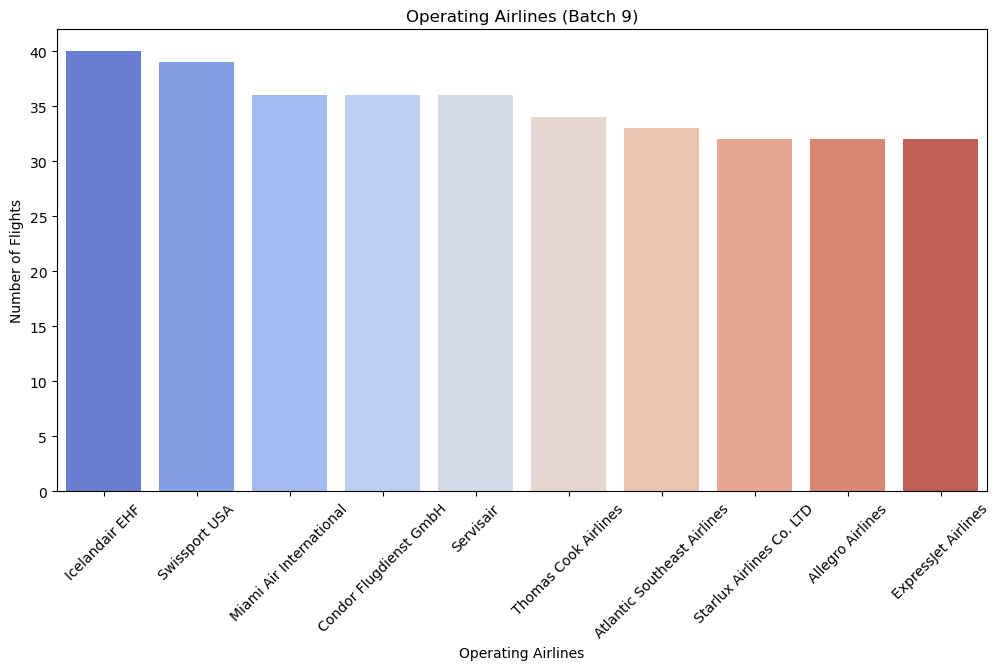

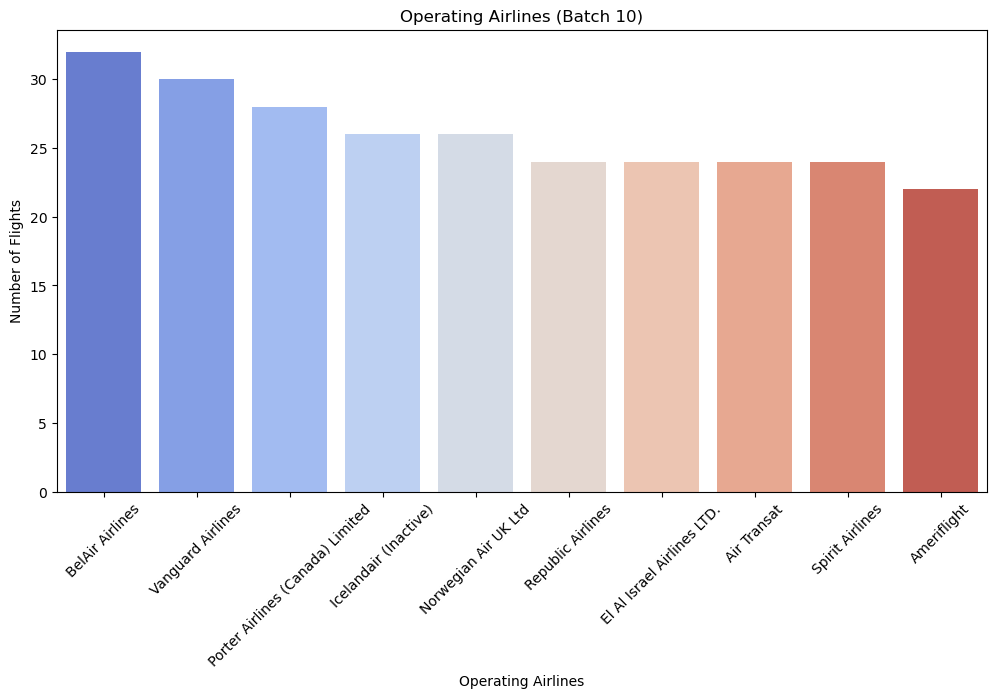

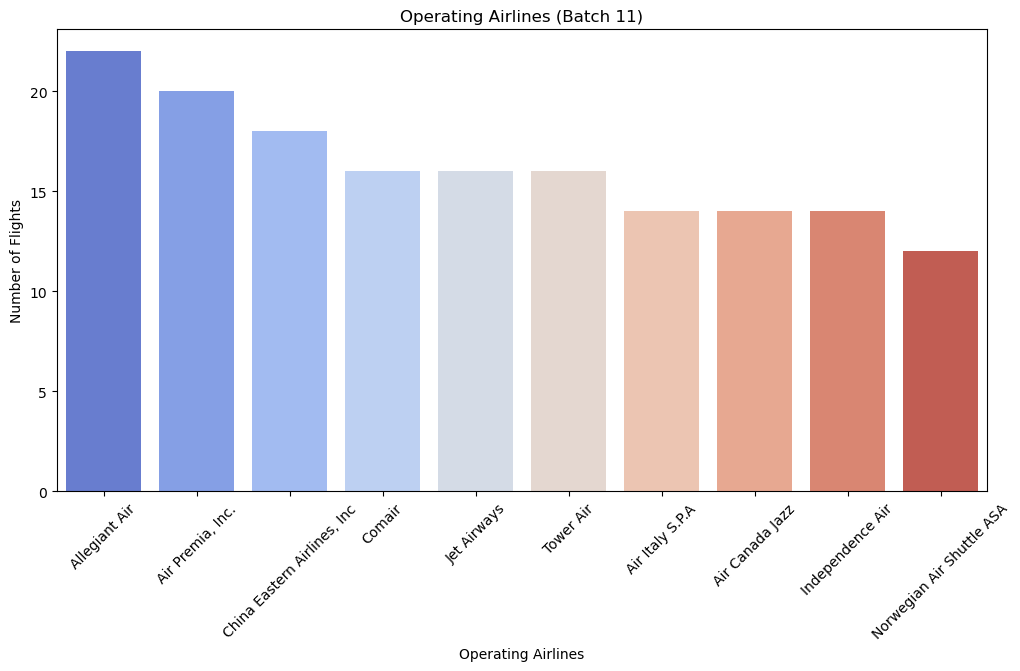

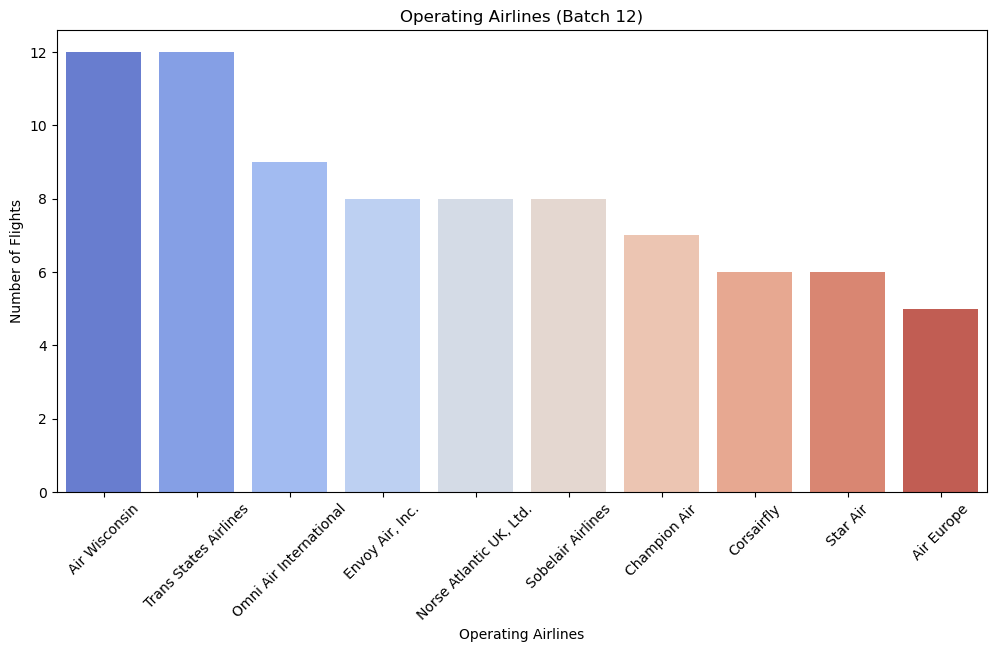

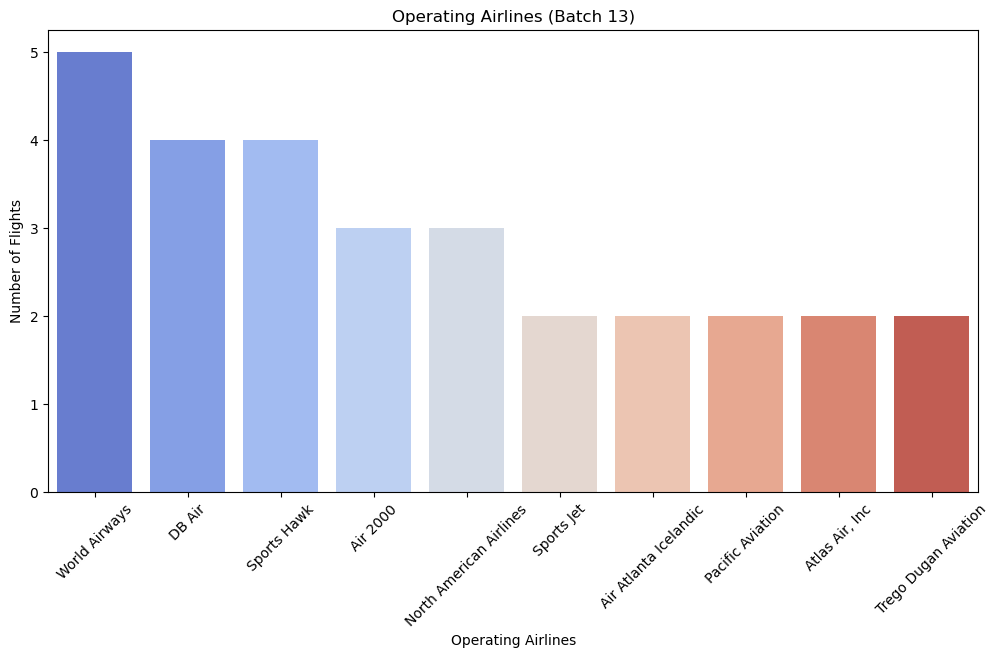

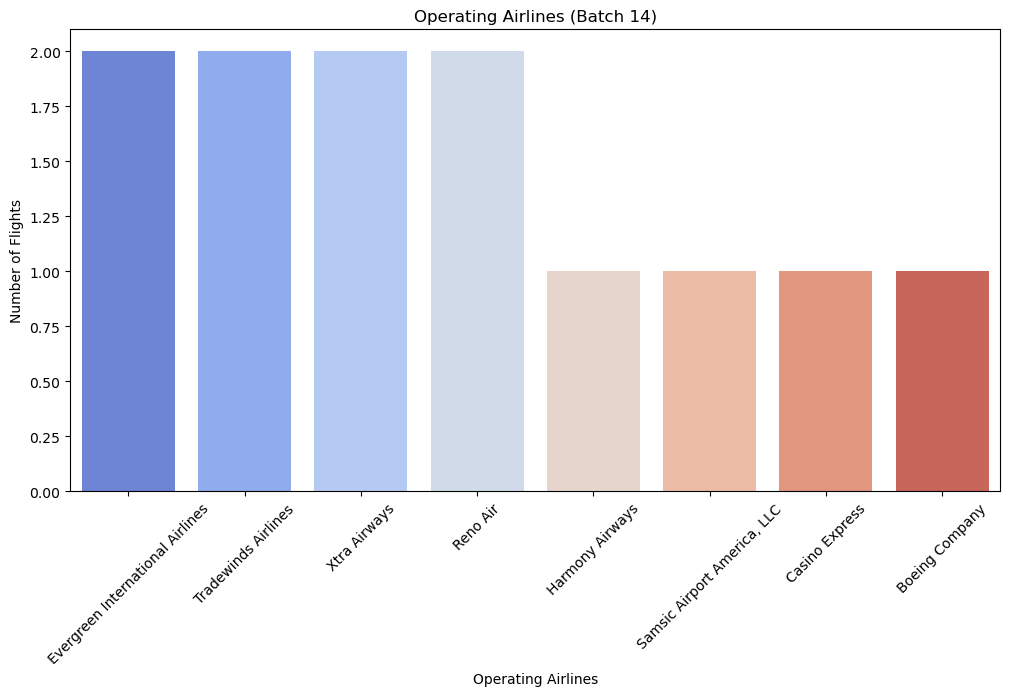

In [8]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Load CSV file
# df = pd.read_csv("Air_Traffic_Passenger_Statistics.csv")

# Count occurrences of each Operating Airline
airline_counts = Aircraft_Statistics["Operating Airline"].value_counts()

# Define batch size (10 flights per chart)
batch_size = 10
total_batches = len(airline_counts) // batch_size + (len(airline_counts) % batch_size > 0)

# Generate separate visualizations for each batch
for batch in range(total_batches):
    start_idx = batch * batch_size
    end_idx = min((batch + 1) * batch_size, len(airline_counts))
    
    # Select a subset of data
    airline_subset = airline_counts[start_idx:end_idx]

    # Create a bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(x=airline_subset.index, y=airline_subset.values, palette="coolwarm")
    
    # Add labels and title
    plt.xlabel("Operating Airlines")
    plt.ylabel("Number of Flights")
    plt.title(f"Operating Airlines (Batch {batch + 1})")
    plt.xticks(rotation=45)
    
    # Display the plot
    plt.show()

In [9]:
# Calculating statistics for "Passenger Count"
print("\nPassenger Count Statistics:")
print(f"Maximum: {Aircraft_Statistics['Passenger Count'].max()}")
print(f"Minimum: {Aircraft_Statistics['Passenger Count'].min()}")
print(f"Average: {Aircraft_Statistics['Passenger Count'].mean()}")
print(f"Q1 (First Quartile): {Aircraft_Statistics['Passenger Count'].quantile(0.25)}")
print(f"Median: {Aircraft_Statistics['Passenger Count'].median()}")
print(f"Q3 (Third Quartile): {Aircraft_Statistics['Passenger Count'].quantile(0.75)}")



Passenger Count Statistics:
Maximum: 856501
Minimum: 0
Average: 27832.67576030996
Q1 (First Quartile): 4370.25
Median: 8604.5
Q3 (Third Quartile): 19730.0


In [10]:
# import pandas as pd

# # Load CSV file
# df = pd.read_csv("Air_Traffic_Passenger_Statistics.csv")

# Count of U.S. carriers and international carriers
USA_Carriers = Aircraft_Statistics[Aircraft_Statistics["Operating Airline"].str.contains("United States", na=False)]["Operating Airline"].nunique()
International_Carriers = Aircraft_Statistics[Aircraft_Statistics["Operating Airline"].str.contains("International", na=False)]["Operating Airline"].nunique()

# Count GEO Summary for Domestic and International
Domestic_GEO = Aircraft_Statistics[Aircraft_Statistics["GEO Summary"].str.contains("Domestic", na=False)]["GEO Summary"].nunique()
International_GEO = Aircraft_Statistics[Aircraft_Statistics["GEO Summary"].str.contains("International", na=False)]["GEO Summary"].nunique()

# Count number of unique terminals
terminals = Aircraft_Statistics["Terminal"].nunique()

# Display results
print(f"Number of U.S. carriers: {USA_Carriers}")
print(f"Number of International carriers: {International_Carriers}")
print(f"Number of Domestic GEO Summary categories: {Domestic_GEO}")
print(f"Number of International GEO Summary categories: {International_GEO}")
print(f"Number of unique terminals: {terminals}")

Number of U.S. carriers: 0
Number of International carriers: 7
Number of Domestic GEO Summary categories: 1
Number of International GEO Summary categories: 1
Number of unique terminals: 5


In [11]:
# import pandas as pd
# import numpy as np
# import tensorflow as tf

# # Load CSV file
# df = pd.read_csv("Air_Traffic_Passenger_Statistics.csv")

# Convert "Passenger Count" to NumPy array (drop missing values)
Passenger_Counts = np.array(Aircraft_Statistics["Passenger Count"].dropna())

# Calculate statistical metrics using NumPy
max_value = np.max(Passenger_Counts)
min_value = np.min(Passenger_Counts)
mean_value = np.mean(Passenger_Counts)
q1_value = np.percentile(Passenger_Counts, 25)
median_value = np.median(Passenger_Counts)
q3_value = np.percentile(Passenger_Counts, 75)

# Display results
print(f"Maximum Passenger Count: {max_value}")
print(f"Minimum Passenger Count: {min_value}")
print(f"Average Passenger Count: {mean_value}")
print(f"Q1 (First Quartile): {q1_value}")
print(f"Median: {median_value}")
print(f"Q3 (Third Quartile): {q3_value}")



Maximum Passenger Count: 856501
Minimum Passenger Count: 0
Average Passenger Count: 27832.67576030996
Q1 (First Quartile): 4370.25
Median: 8604.5
Q3 (Third Quartile): 19730.0


In [12]:
# Convert data to TensorFlow tensor
Passenger_tf_tensor = tf.convert_to_tensor(Passenger_Counts, dtype=tf.float32)

# Display TensorFlow tensor details
print("\nTensorFlow tensor shape:", Passenger_tf_tensor.shape)
print("TensorFlow tensor data type:", Passenger_tf_tensor.dtype)


TensorFlow tensor shape: (37682,)
TensorFlow tensor data type: <dtype: 'float32'>
